In [1]:
import pandas as pd

df = pd.read_csv("employee_attrition.csv")


In [2]:
# iterate through columns dropping rows with null values and print unique values 
for i in df.columns:
    df = df.dropna(subset=[i])
    unique_values = df[i].unique()
    print(str(i) + ": " + str(unique_values))

# drop useless columns
df.drop(columns=["EmployeeID"], inplace=True)
df.drop(columns=["EmployeeCount"], inplace=True)
df.drop(columns=["Over18"], inplace=True)
df.drop(columns=["StandardHours"], inplace=True)

# convert categorical values into integer values
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
df["Attrition"] = encoder.fit_transform(df[["Attrition"]])
df["BusinessTravel"] = encoder.fit_transform(df[["BusinessTravel"]])
df["Department"] = encoder.fit_transform(df[["Department"]])
df["EducationField"] = encoder.fit_transform(df[["EducationField"]])
df["Gender"] = encoder.fit_transform(df[["Gender"]])
df["JobRole"] = encoder.fit_transform(df[["JobRole"]])
df["MaritalStatus"] = encoder.fit_transform(df[["MaritalStatus"]])

# normalize the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

#print(df.shape[0])
df.head()

EmployeeID: [   1    2    3 ... 4408 4409 4410]
Age: [51 31 32 38 46 28 29 25 45 36 55 47 37 21 35 26 50 53 42 44 49 18 41 39
 58 33 43 52 27 30 54 40 23 48 57 34 24 22 56 60 19 20 59]
Attrition: ['No' 'Yes']
BusinessTravel: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department: ['Sales' 'Research & Development' 'Human Resources']
DistanceFromHome: [ 6 10 17  2  8 11 18  1  7 28 14  3  4 16  9  5 20 29 15 13 24 19 22 25
 21 26 27 12 23]
Education: [2 1 4 5 3]
EducationField: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
EmployeeCount: [1]
Gender: ['Female' 'Male']
JobLevel: [1 4 3 2 5]
JobRole: ['Healthcare Representative' 'Research Scientist' 'Sales Executive'
 'Human Resources' 'Research Director' 'Laboratory Technician'
 'Manufacturing Director' 'Sales Representative' 'Manager']
MaritalStatus: ['Married' 'Single' 'Divorced']
MonthlyIncome: [131160  41890 193280 ...  37020  23980  54680]
NumCompaniesWorked: [1. 0. 3. 4. 2. 7. 9. 5. 6. 8

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,0.785714,0.0,1.0,1.0,0.178571,0.25,0.2,0.0,0.00,0.000,...,0.025,1.000000,0.025,0.000000,0.000000,0.666667,1.000000,0.333333,0.666667,0.0
1,0.309524,1.0,0.5,0.5,0.321429,0.00,0.2,0.0,0.00,0.750,...,0.150,0.500000,0.125,0.066667,0.235294,0.666667,0.333333,1.000000,0.333333,1.0
2,0.333333,0.0,0.5,0.5,0.571429,0.75,0.8,1.0,0.75,0.875,...,0.125,0.333333,0.125,0.000000,0.176471,0.333333,0.333333,0.000000,0.666667,0.0
3,0.476190,0.0,0.0,0.5,0.035714,1.00,0.2,1.0,0.50,0.125,...,0.325,0.833333,0.200,0.466667,0.294118,1.000000,1.000000,0.666667,0.333333,0.0
4,0.333333,0.0,1.0,0.5,0.321429,0.00,0.6,1.0,0.00,0.875,...,0.225,0.333333,0.150,0.000000,0.235294,1.000000,0.000000,0.666667,0.666667,0.0


In [ ]:
df.to_csv('employee_attrition_cleaned.csv', index=False)

In [25]:
corr_matrix = df.corr()
corr_matrix["Attrition"].sort_values(ascending=False)

Attrition                  1.000000
MaritalStatus              0.161126
NumCompaniesWorked         0.043911
PercentSalaryHike          0.034425
JobRole                    0.028400
PerformanceRating          0.026262
Gender                     0.018624
BusinessTravel             0.001888
StockOptionLevel          -0.007971
DistanceFromHome          -0.008314
JobLevel                  -0.014587
JobInvolvement            -0.014705
Education                 -0.015237
YearsSinceLastPromotion   -0.029931
MonthlyIncome             -0.032629
Department                -0.044456
TrainingTimesLastYear     -0.046239
EducationField            -0.055620
WorkLifeBalance           -0.059817
JobSatisfaction           -0.103098
EnvironmentSatisfaction   -0.103485
YearsAtCompany            -0.133612
YearsWithCurrManager      -0.155420
Age                       -0.155584
TotalWorkingYears         -0.168637
Name: Attrition, dtype: float64

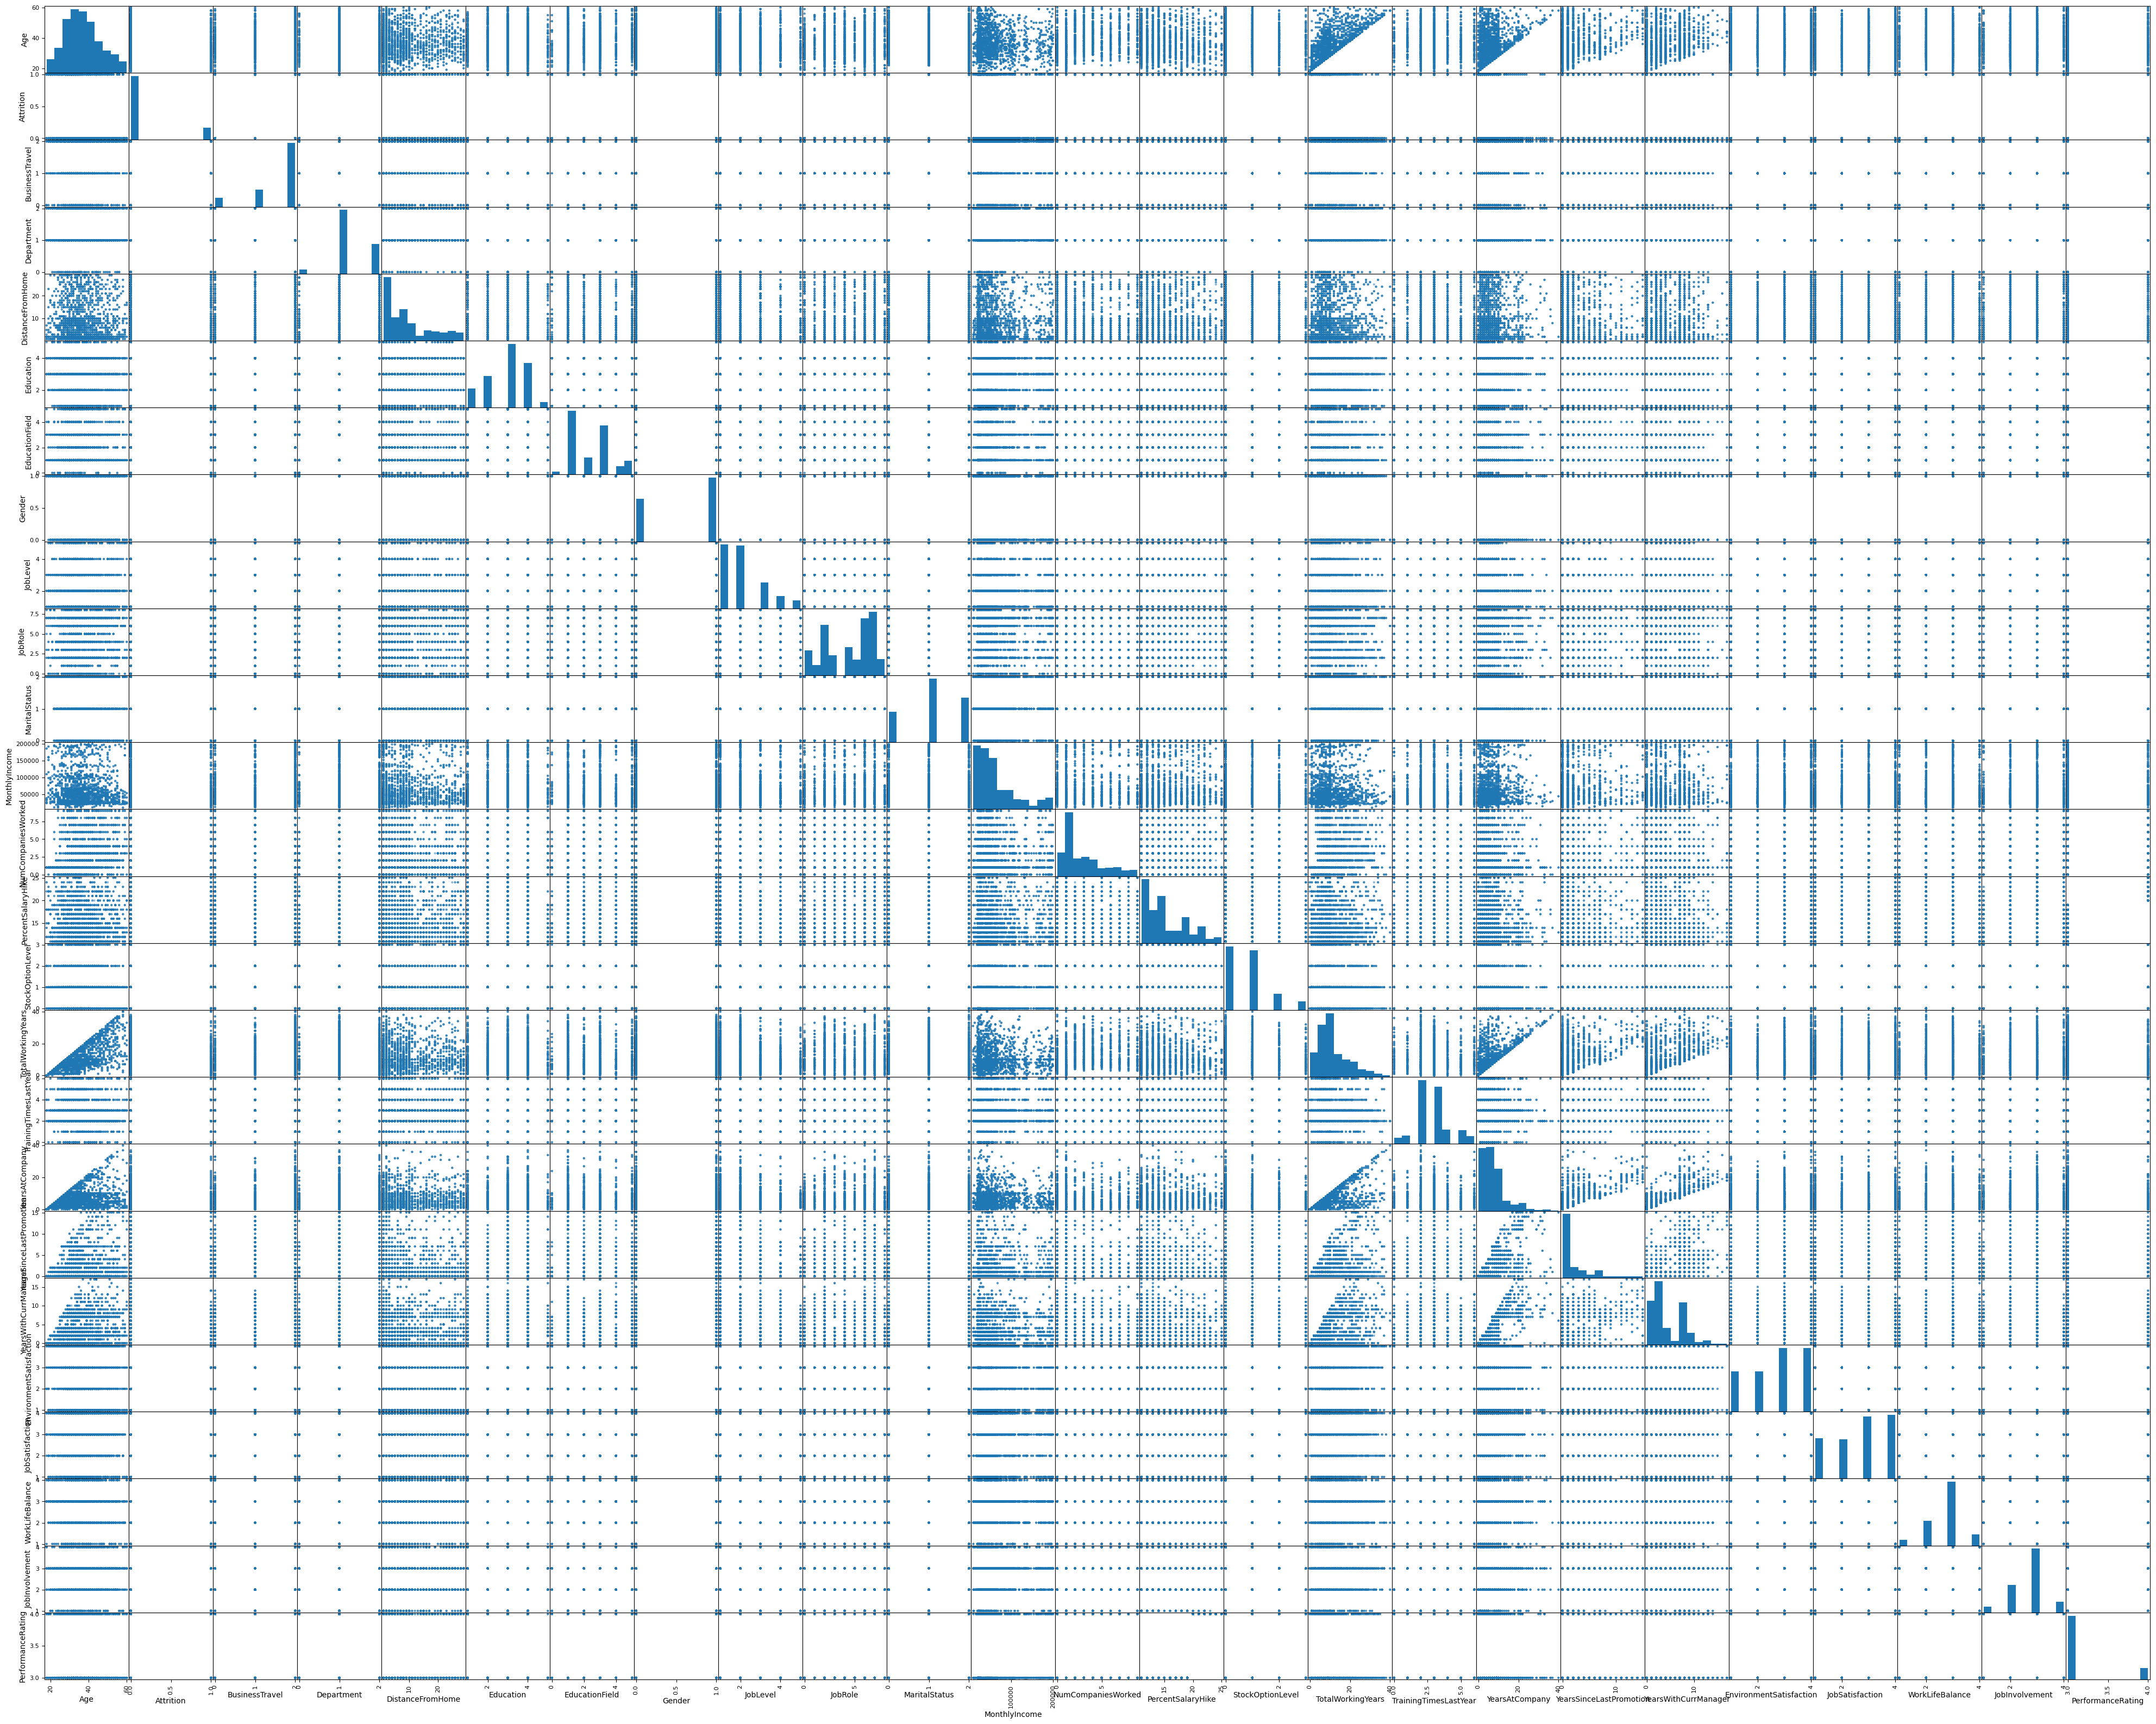

In [11]:
# create correlation matrix
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

#attributes = [x for x in df.columns]
scatter_matrix(df, figsize=(50,40))
plt.show()